In [104]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
password = getpass.getpass()

········


In [106]:

# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT film_id, title, inventory_id, rental_rate, length, replacement_cost, rating, rental_id, rental_date, customer_id, category_id
FROM film
join inventory using (film_id)
join rental using (inventory_id)
join film_category using(film_id)
group by film_id
order by film_id;'''
data = pd.read_sql_query(query, engine)
data.head()

,film_id,title,inventory_id,rental_rate,length,replacement_cost,rating,rental_id,rental_date,customer_id,category_id
0,1,ACADEMY DINOSAUR,1,0.99,86,20.99,PG,4863,2005-07-08 19:03:15,431,6
1,2,ACE GOLDFINGER,9,4.99,48,12.99,G,10310,2005-08-01 04:24:47,271,11
2,3,ADAPTATION HOLES,12,2.99,50,18.99,NC-17,6999,2005-07-27 01:21:19,224,6
3,4,AFFAIR PREJUDICE,16,2.99,117,26.99,G,6493,2005-07-12 02:40:41,184,11
4,5,AFRICAN EGG,23,2.99,130,22.99,G,552,2005-05-28 07:53:38,106,8


In [107]:
data = pd.read_sql_query(query, engine)
data.head(10)

,film_id,title,inventory_id,rental_rate,length,replacement_cost,rating,rental_id,rental_date,customer_id,category_id
0,1,ACADEMY DINOSAUR,1,0.99,86,20.99,PG,4863,2005-07-08 19:03:15,431,6
1,2,ACE GOLDFINGER,9,4.99,48,12.99,G,10310,2005-08-01 04:24:47,271,11
2,3,ADAPTATION HOLES,12,2.99,50,18.99,NC-17,6999,2005-07-27 01:21:19,224,6
3,4,AFFAIR PREJUDICE,16,2.99,117,26.99,G,6493,2005-07-12 02:40:41,184,11
4,5,AFRICAN EGG,23,2.99,130,22.99,G,552,2005-05-28 07:53:38,106,8
5,6,AGENT TRUMAN,26,2.99,169,17.99,PG,317,2005-05-26 23:23:56,391,9
6,7,AIRPLANE SIERRA,32,4.99,62,28.99,PG-13,11084,2005-08-02 07:34:19,369,5
7,8,AIRPORT POLLOCK,37,4.99,54,15.99,R,120,2005-05-25 19:37:47,365,11
8,9,ALABAMA DEVIL,41,2.99,114,21.99,PG-13,5745,2005-07-10 12:10:11,305,11
9,10,ALADDIN CALENDAR,46,4.99,63,24.99,NC-17,1948,2005-06-17 08:06:53,89,15


In [108]:
# checking NAN Valuesdata.dtypes
data.dtypes
data.isna().sum()

film_id             0
title               0
inventory_id        0
rental_rate         0
length              0
replacement_cost    0
rating              0
rental_id           0
rental_date         0
customer_id         0
category_id         0
dtype: int64

In [109]:

# splitting year and month
data['YearMonth'] = data['rental_date'].map(lambda x: 100*x.year + x.month)
# applying boolean for target value
def mask(x):
    if x == 200508:
        return 'True'
    else:
        return 'False'
data['rented_in_aug'] = data['YearMonth'].apply(mask)
data.head()

,film_id,title,inventory_id,rental_rate,length,replacement_cost,rating,rental_id,rental_date,customer_id,category_id,YearMonth,rented_in_aug
0,1,ACADEMY DINOSAUR,1,0.99,86,20.99,PG,4863,2005-07-08 19:03:15,431,6,200507,False
1,2,ACE GOLDFINGER,9,4.99,48,12.99,G,10310,2005-08-01 04:24:47,271,11,200508,True
2,3,ADAPTATION HOLES,12,2.99,50,18.99,NC-17,6999,2005-07-27 01:21:19,224,6,200507,False
3,4,AFFAIR PREJUDICE,16,2.99,117,26.99,G,6493,2005-07-12 02:40:41,184,11,200507,False
4,5,AFRICAN EGG,23,2.99,130,22.99,G,552,2005-05-28 07:53:38,106,8,200505,False


In [110]:

# Saved dropped columns
dropped = data.drop(['title', 'film_id', 'rental_date','YearMonth'], axis=1)

In [111]:

data= data.drop(['title', 'film_id','inventory_id','rental_id','customer_id', 'category_id','rental_date','YearMonth'], axis=1)
data

,rental_rate,length,replacement_cost,rating,rented_in_aug
0,0.99,86,20.99,PG,False
1,4.99,48,12.99,G,True
2,2.99,50,18.99,NC-17,False
3,2.99,117,26.99,G,False
4,2.99,130,22.99,G,False
...,...,...,...,...,...
953,0.99,183,9.99,G,False
954,0.99,179,14.99,NC-17,False
955,0.99,105,10.99,NC-17,False
956,2.99,101,28.99,R,False


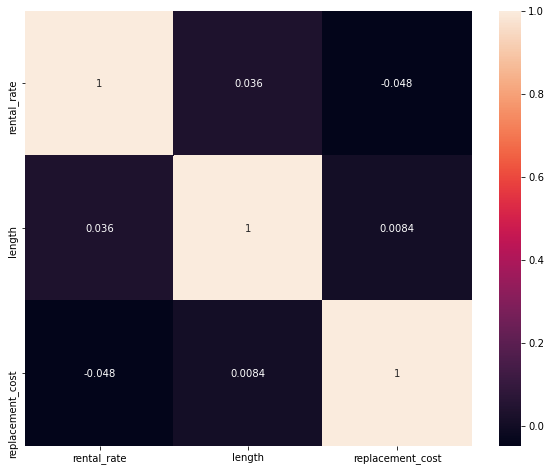

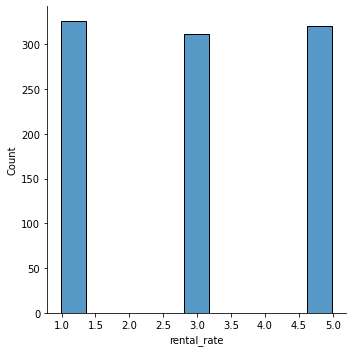

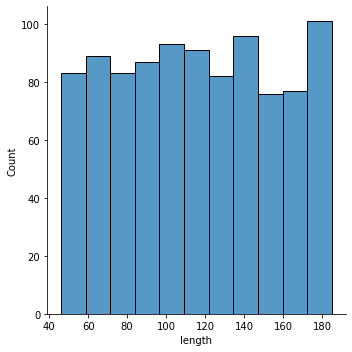

In [112]:
#  multicolinearity and distributions of numericals
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show() # Numericals not correlated, sweet

sns.displot(data['rental_rate'])
plt.show()
sns.displot(data['length'])
plt.show() # different thresholds, need to standardize

In [113]:
# y and X

y = data['rented_in_aug']
X = data.drop('rented_in_aug', axis = 1)

In [114]:
# Splitting the train and test data before transformations

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31337)

In [115]:

# Standardizing the numericals using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num)
X_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_normalized, columns = X_train_num.columns)

In [116]:

# Encoding categoricals

X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical,
                            columns = ['rating'],
                            drop_first = True)
X_train_cat

,rating_NC-17,rating_PG,rating_PG-13,rating_R
515,1,0,0,0
676,0,0,0,1
806,1,0,0,0
118,0,0,0,0
828,0,0,1,0
...,...,...,...,...
701,0,0,0,1
253,1,0,0,0
534,1,0,0,0
543,0,0,0,0


In [117]:
# X and y for model training

y_train
X_train_transformed = np.concatenate((X_train_norm, X_train_cat), axis=1)

In [118]:

# Creating a logistic regression model

from sklearn.linear_model import LogisticRegression

model_a = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [119]:

# Scaling and encoding test data 

X_test_num = X_test.select_dtypes(include = np.number)

X_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_normalized, columns = X_test_num.columns)

X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical,
                            columns = ['rating'],
                            drop_first = True)

In [120]:
# final X for model training

X_test_transformed = np.concatenate((X_test_norm, X_test_cat), axis=1)

In [121]:
# Making predictions using the models and test data

pred_model_a = model_a.predict(X_test_transformed)
display(model_a.score(X_test_transformed, y_test))

0.9010416666666666

In [122]:
# Checking for confusion matrix

from sklearn.metrics import confusion_matrix

display(confusion_matrix(y_test, pred_model_a))

array([[173,   0],
       [ 19,   0]], dtype=int64)

In [123]:
# Conclusions
# there is a large imbalance in the data 
# 90% of all the movies available were rented in august